![](https://zeeshanusmani.com/wp-content/uploads/2019/10/Kaggle3.png)

# Tabular Playground Series - Jan 2021 : Competition 
---


This notebook is a ***basic interpretation*** to the competition.

As I have done by whole work in [**Goggle Collab**](https://colab.research.google.com/) the topmost 3 code cells are not necessary for the competitors whoa re using kaggle notebooks.

In [1]:

!pip install -q kaggle

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c tabular-playground-series-jan-2021

 81% 31.0M/38.4M [00:01<00:00, 10.0MB/s]
100% 38.4M/38.4M [00:01<00:00, 24.2MB/s]
 21% 5.00M/23.9M [00:00<00:01, 15.2MB/s]
100% 23.9M/23.9M [00:00<00:00, 53.8MB/s]
  0% 0.00/469k [00:00<?, ?B/s]
100% 469k/469k [00:00<00:00, 64.2MB/s]


### Note :
---
Always remember the **API token will work after you join** the competition.

In [3]:
from zipfile import ZipFile
zf = ZipFile('train.csv.zip', 'r')
zf.extractall('/content')
zf.close()
zf = ZipFile('test.csv.zip', 'r')
zf.extractall('/content')
zf.close()
zf = ZipFile('sample_submission.csv.zip', 'r')
zf.extractall('/content')
zf.close()

In [4]:
# supporting libraries ---------------------------------------------------------

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import re
import os
import glob
import cv2

# data processing library function ---------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# Machine Learning Models ------------------------------------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
import xgboost as xgb


## Primary Visualization over data
---

We are going to read the datas into dataframes and then check -
1. How they look (**dataframe.head()**) , 
2. See their information (**dataframe.info()**) 
3. See further(**dataframe.describe()**)

In [5]:
train=pd.read_csv('train.csv')

In [6]:
test=pd.read_csv('test.csv')

In [7]:
sample_submission=pd.read_csv('sample_submission.csv')

In [8]:
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [9]:
test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [10]:
sample_submission.head()

,id,target
0,0,0.5
1,2,0.5
2,6,0.5
3,7,0.5
4,10,0.5


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cont1   200000 non-null  float64
 2   cont2   200000 non-null  float64
 3   cont3   200000 non-null  float64
 4   cont4   200000 non-null  float64
 5   cont5   200000 non-null  float64
 6   cont6   200000 non-null  float64
 7   cont7   200000 non-null  float64
 8   cont8   200000 non-null  float64
 9   cont9   200000 non-null  float64
 10  cont10  200000 non-null  float64
 11  cont11  200000 non-null  float64
 12  cont12  200000 non-null  float64
 13  cont13  200000 non-null  float64
 14  cont14  200000 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 22.9 MB


In [13]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   target  200000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.1 MB


In [14]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [15]:
test.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,250261.031215,0.507222,0.498080,0.521381,0.514801,0.502274,0.526987,0.487722,0.525284,0.460257,0.520478,0.484187,0.506763,0.554390,0.503174
std,144128.894365,0.204220,0.227866,0.200656,0.232995,0.220812,0.218145,0.180805,0.216084,0.197217,0.201645,0.219972,0.218598,0.229730,0.208333
min,0.000000,-0.061638,-0.030548,0.040867,0.153318,0.276679,0.075104,-0.024760,0.219631,-0.231308,-0.109759,0.078859,0.094504,0.015367,0.164500
25%,125538.250000,0.343649,0.322703,0.344251,0.294361,0.284113,0.356357,0.347336,0.342148,0.330739,0.375496,0.301236,0.310875,0.350956,0.308210
50%,250389.500000,0.484292,0.553147,0.551413,0.482019,0.451960,0.471000,0.466392,0.483781,0.416900,0.458622,0.442037,0.485527,0.491538,0.431124
75%,375240.250000,0.644079,0.686518,0.648656,0.747133,0.670831,0.694422,0.580666,0.685070,0.575248,0.700157,0.677691,0.694630,0.769323,0.712664
max,499990.000000,1.017577,0.853813,1.001791,0.997446,1.033722,1.046715,1.054225,1.026280,1.001405,1.140639,1.023151,1.049417,0.977223,0.868679


#### Leakage :
---
Checking if there are leakages or not.

In [16]:
train.duplicated().sum()

0

In [17]:
test.duplicated().sum()

0

There are no leakages. :)

Now creating featureset and the target value.

In [18]:
X_train=train.drop('target',1)
y_train=train['target']
X_test=test
id=test['id']
X_train.drop('id',1,inplace=True)
X_test.drop('id',1,inplace=True)

Checking if there are any constant or quasiconstant features.

In [19]:
scaler=VarianceThreshold(0.01)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
X_train.shape

(300000, 14)

In [21]:
X_test.shape

(200000, 14)

Visualizing the feature and checking if there are any serious correlation with the target value of the featureset features.

In [23]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

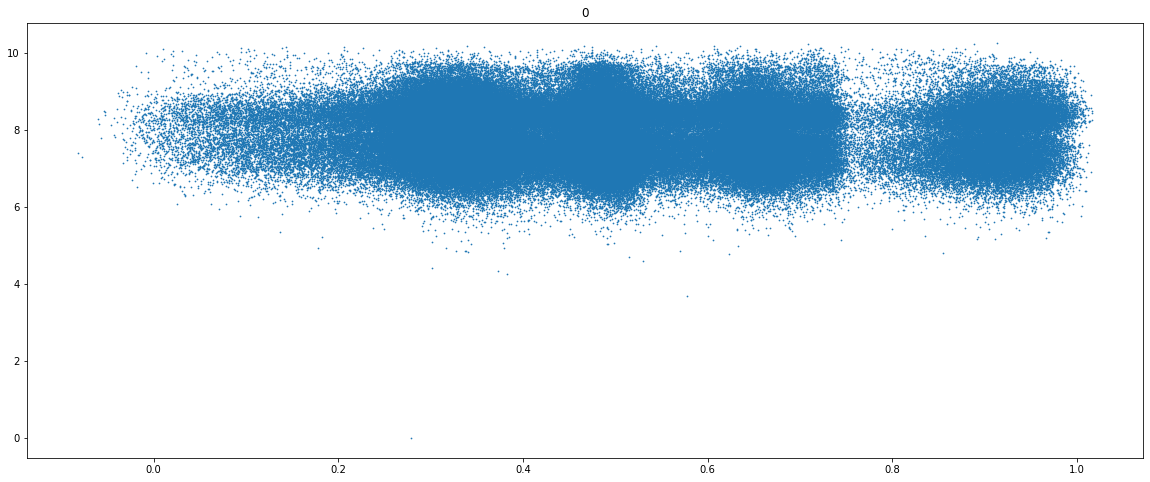

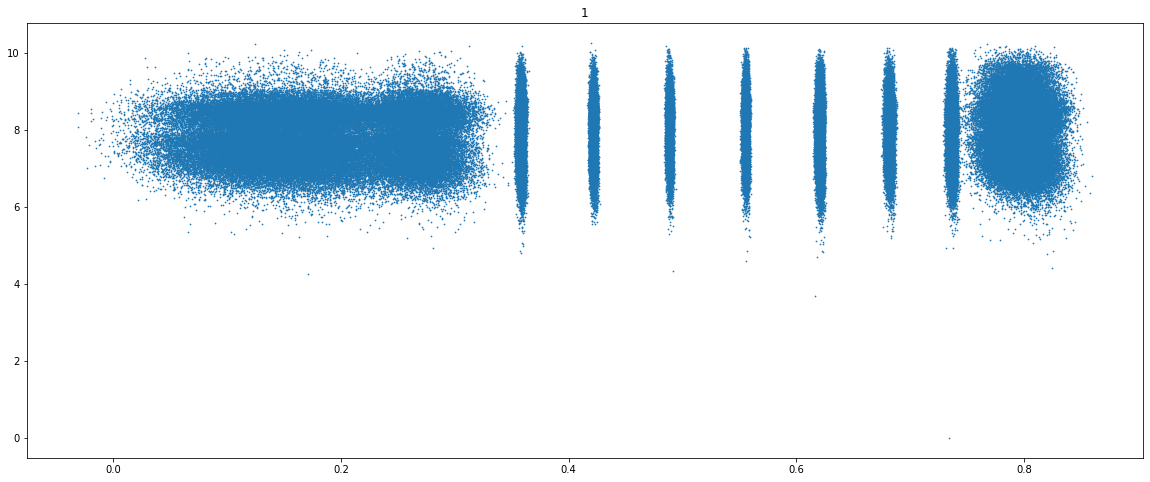

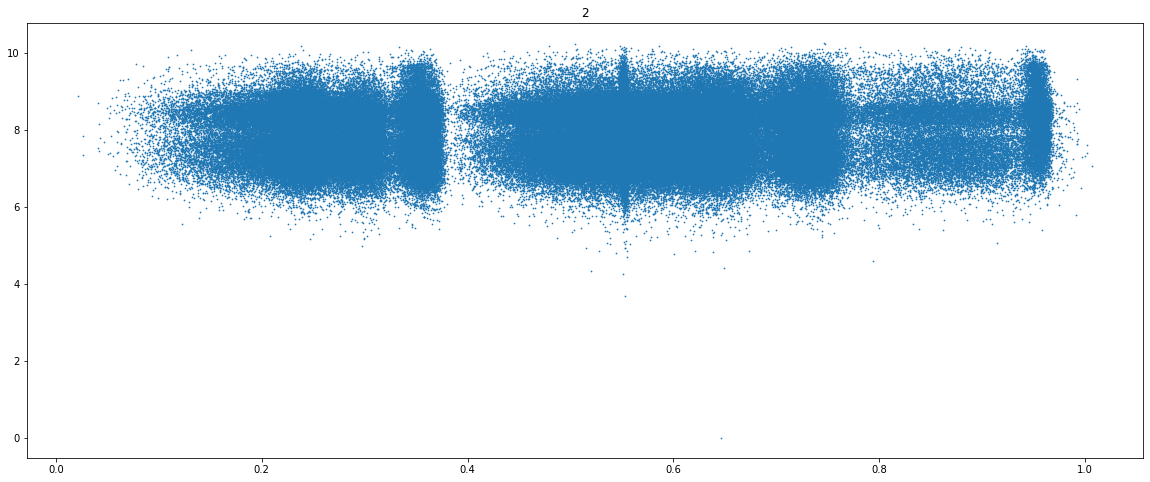

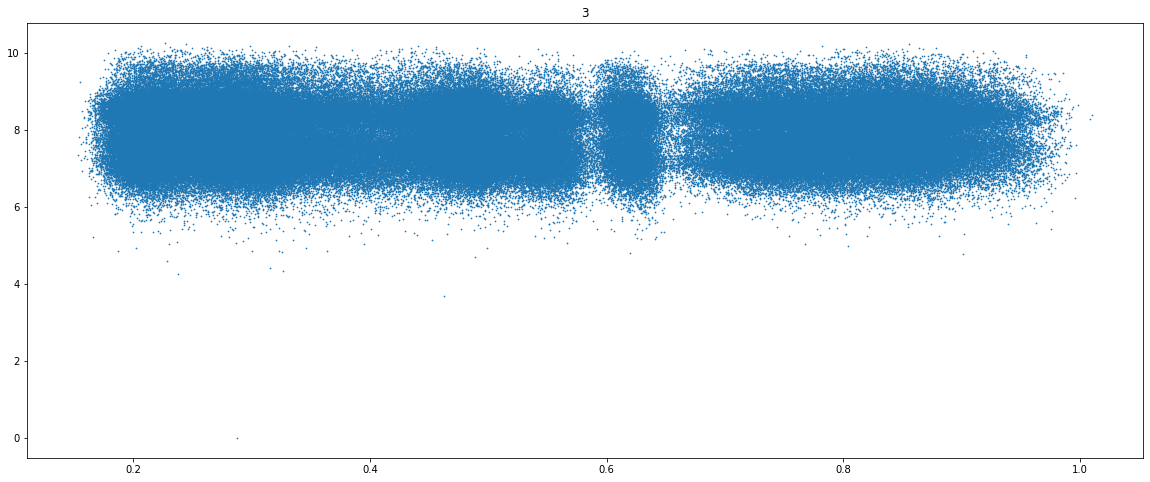

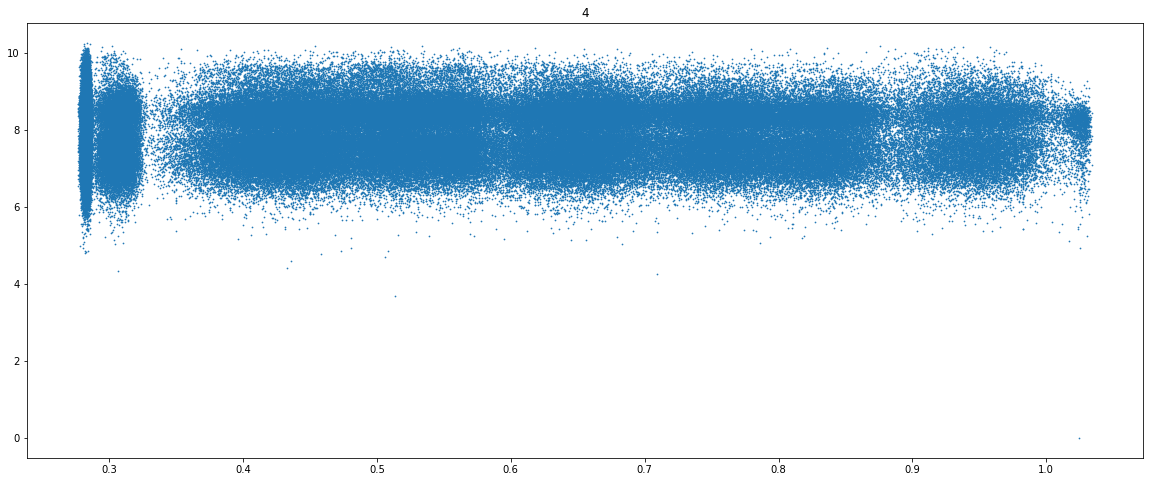

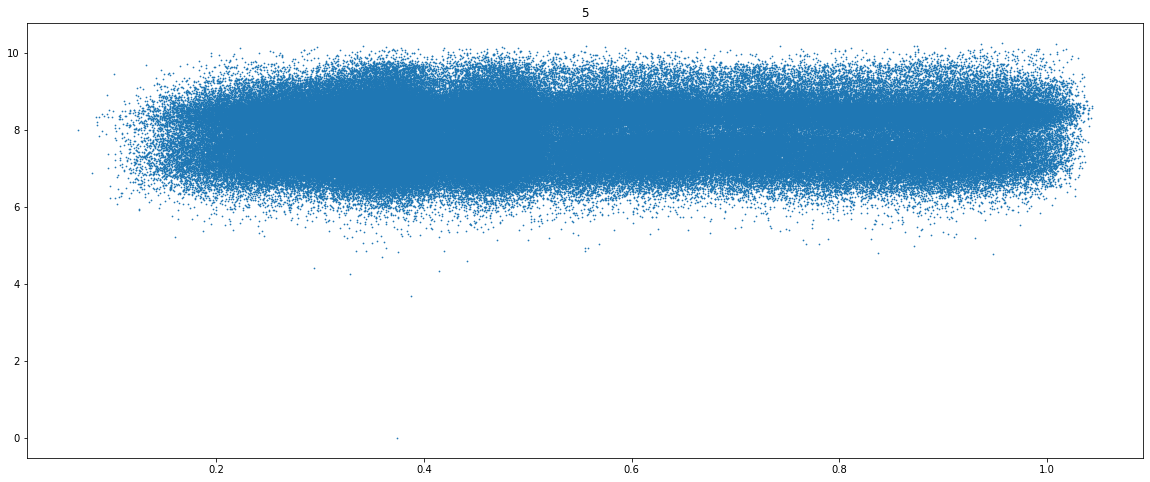

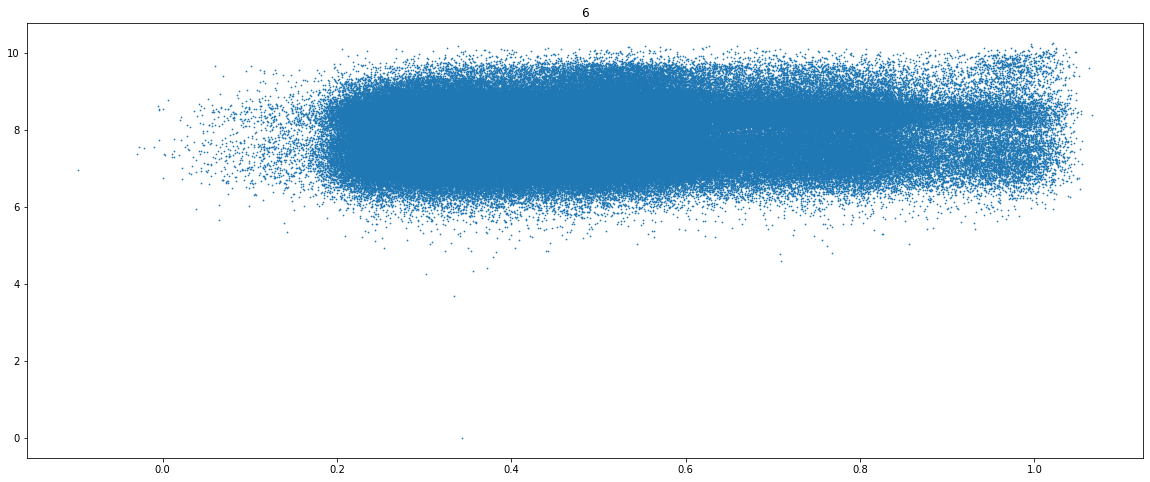

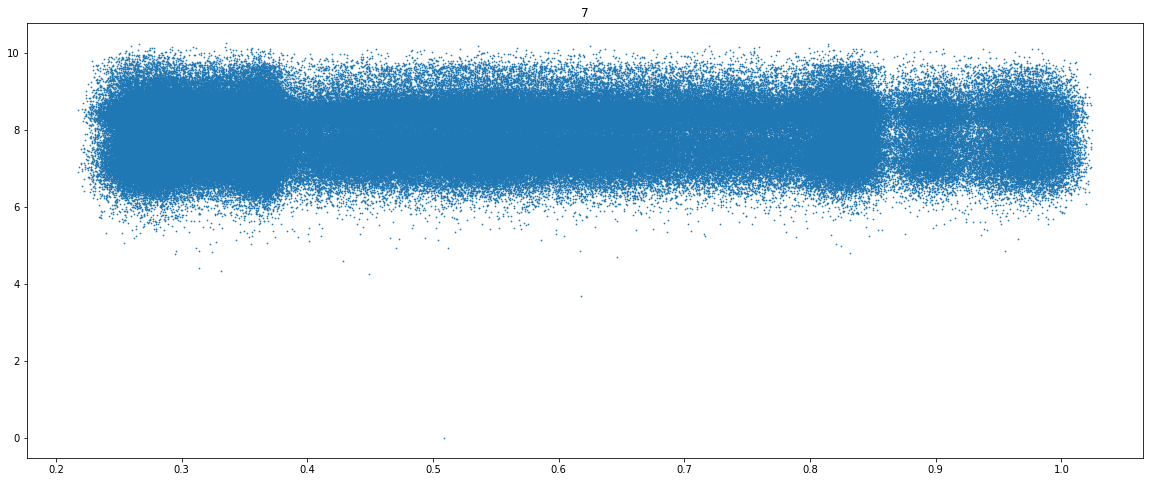

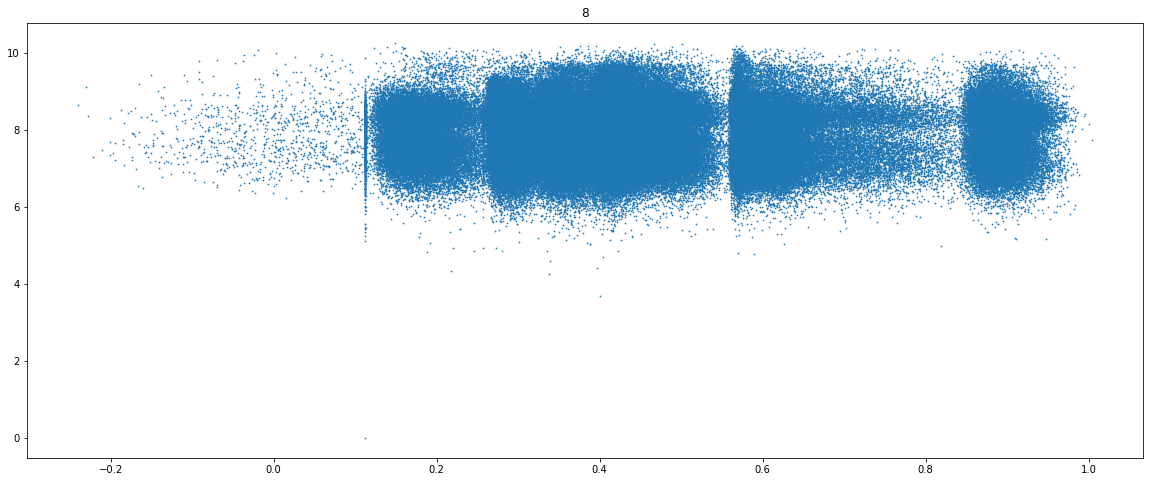

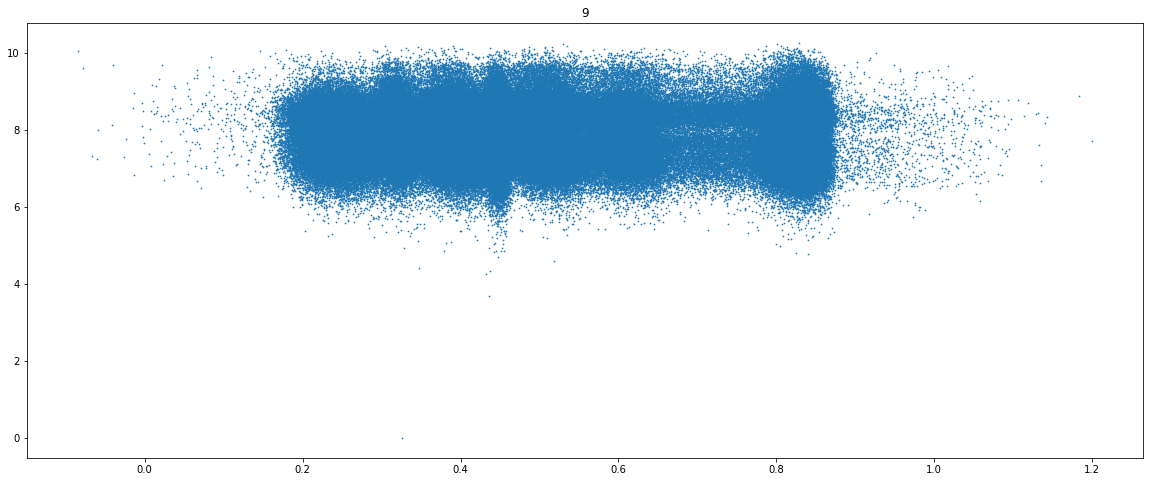

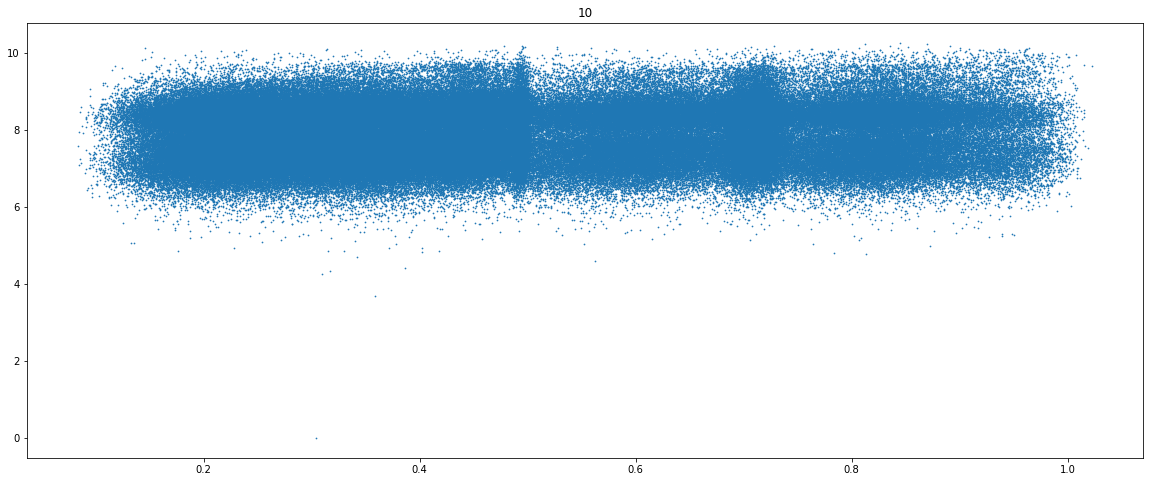

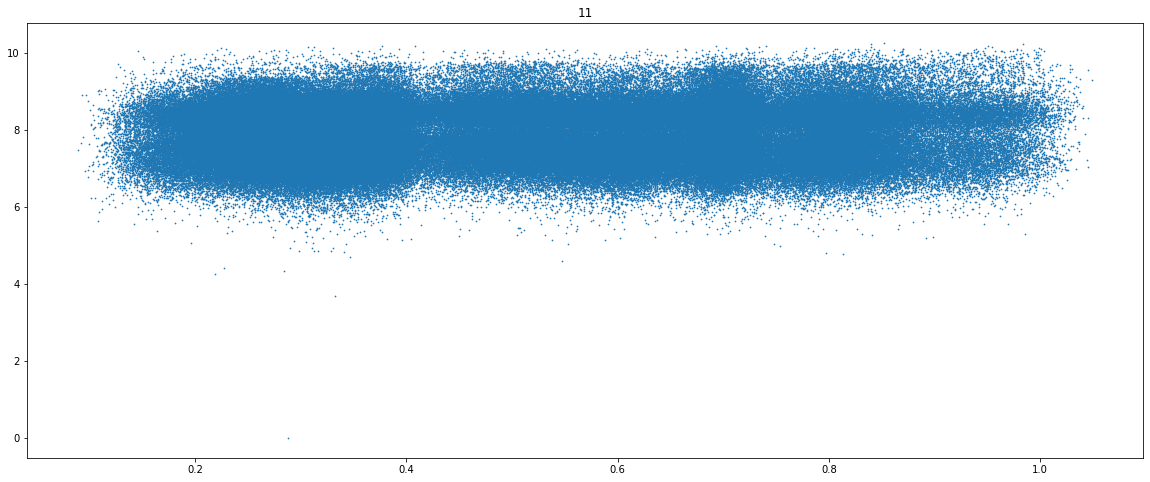

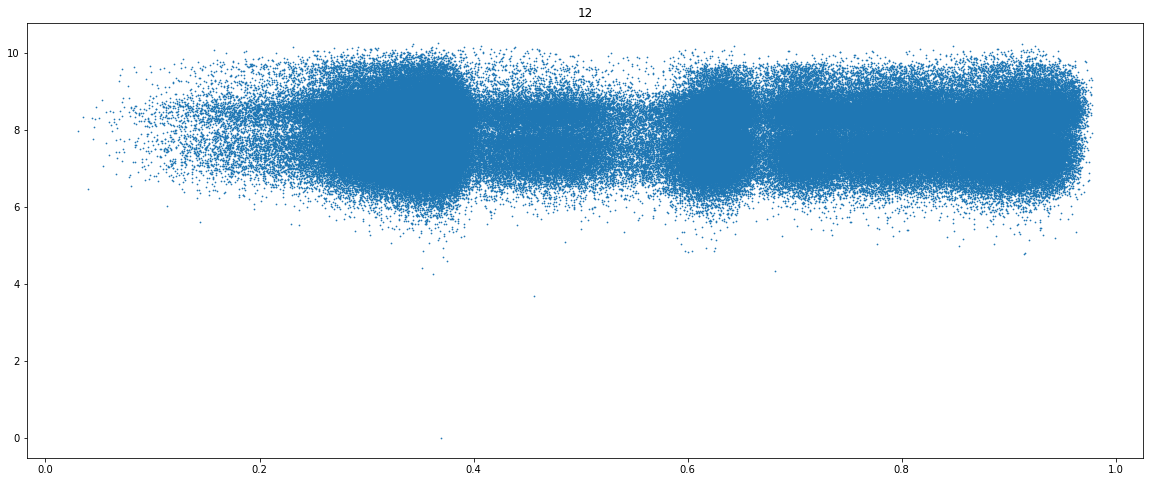

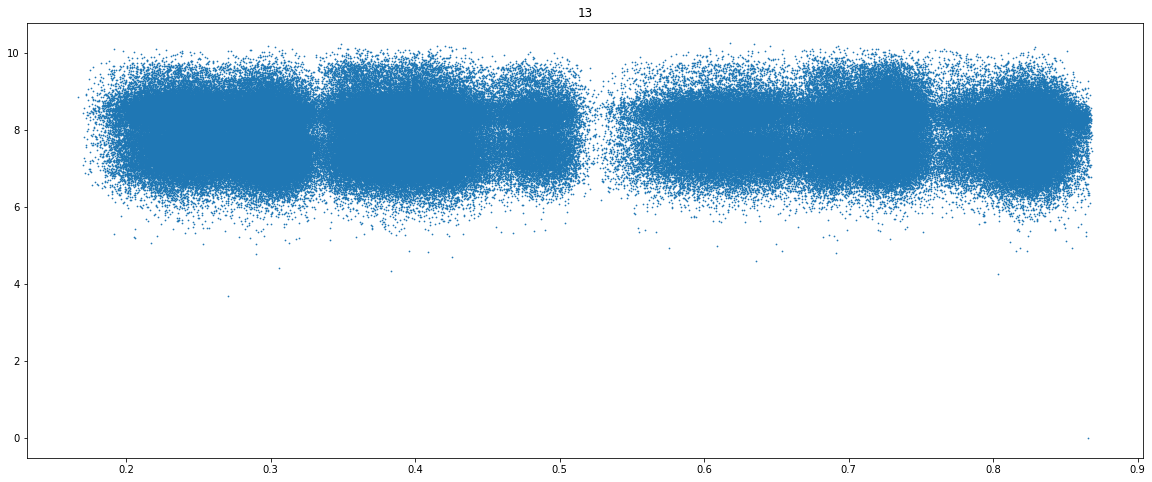

In [24]:
for col in X_train.columns:
  plt.figure(figsize=(20,8))
  plt.scatter(X_train[col],y_train,s=0.5)
  plt.title(col)
  plt.show()

No too serious observation was located or distinguished.

# Model Generation and Model evaluation :
---

We are selecting world class regressor model RandomForestRegressor and the parameters are calibrated as defaults.

In [25]:
model=RandomForestRegressor(random_state=0)

Splitting the train data into train and the validation which will help us to figure out the model is working well or not. 
We are using a 80-20 train-val split.



In [26]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [27]:
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8693974665120978

In [28]:
model.score(X_val,y_val)

0.06538029771698106

The val accuracy is not any good XD

Still we'll proceed further as this is going to be  my first submission in this competition. :D

In [29]:
y_pred=model.predict(X_test)

Now we have predicted on the test data.

After submitting you can see that this will give you score around 0.70.


---
#THANK YOU
---

DO ***STAR*** if find helpful :)